In [1]:
!pip install pandas numpy scipy kaleido==0.2.1 matplotlib pyarrow pooch seaborn plotly xarray ipywidgets cfgrib cartopy scikit-learn tensorflow openpyxl

In [2]:
import pandas as pd
df = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata-may1_2014-may31_2017.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df.head())

                 Date  Hour  Interval          Load  Solar        Wind  \
0 2014-05-01 00:00:00     1         1  24032.844887    0.0  314.062728   
1 2014-05-01 00:05:00     1         2  23924.565362    0.0  295.105121   
2 2014-05-01 00:10:00     1         3  23825.120831    0.0  286.878657   
3 2014-05-01 00:15:00     1         4  23703.799221    0.0  281.568693   
4 2014-05-01 00:20:00     1         5  23553.907284    0.0  275.988442   

       Net Load   Renewables      Nuclear  Large Hydro      Imports  \
0  23718.782158  1892.821345  2287.056986  1793.314811  7859.100231   
1  23629.460241  1872.795630  2287.002839  1638.089648  8017.640777   
2  23538.242173  1860.851580  2286.886355  1595.492447  7697.315440   
3  23422.230528  1856.229999  2287.081875  1441.295192  7447.957304   
4  23277.918842  1846.716080  2287.142445  1396.720704  7316.540233   

     Generation       Thermal  Load Less (Generation+Imports)  
0  16186.122205  10212.929063                      -12.377549  


In [4]:
df2017 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata-jun1_2017-dec31_2017.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2017.head())

                 Date  Hour  Interval          Load  Solar         Wind  \
0 2017-06-01 00:00:00     1         1  22586.671834    0.0  4321.312620   
1 2017-06-01 00:05:00     1         2  22582.666044    0.0  4310.179329   
2 2017-06-01 00:10:00     1         3  22546.522414    0.0  4353.386396   
3 2017-06-01 00:15:00     1         4  22436.634480    0.0  4359.335743   
4 2017-06-01 00:20:00     1         5  22356.478449    0.0  4356.313435   

       Net Load   Renewables      Nuclear  Large Hydro      Imports  \
0  18265.359214  6185.487034  1135.172082  4470.724637  7485.004154   
1  18272.486715  6154.455887  1135.171789  4554.128373  7454.855632   
2  18193.136018  6199.578442  1135.300890  4593.079786  7355.676634   
3  18077.298737  6204.996043  1135.106347  4554.321017  7342.542218   
4  18000.165014  6198.630669  1135.090024  4532.871757  7438.825417   

     Generation      Thermal  Load Less (Generation+Imports)  
0  15101.496191  3310.112438                        0.17148

In [5]:
import datetime
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np; np.random.seed(1)

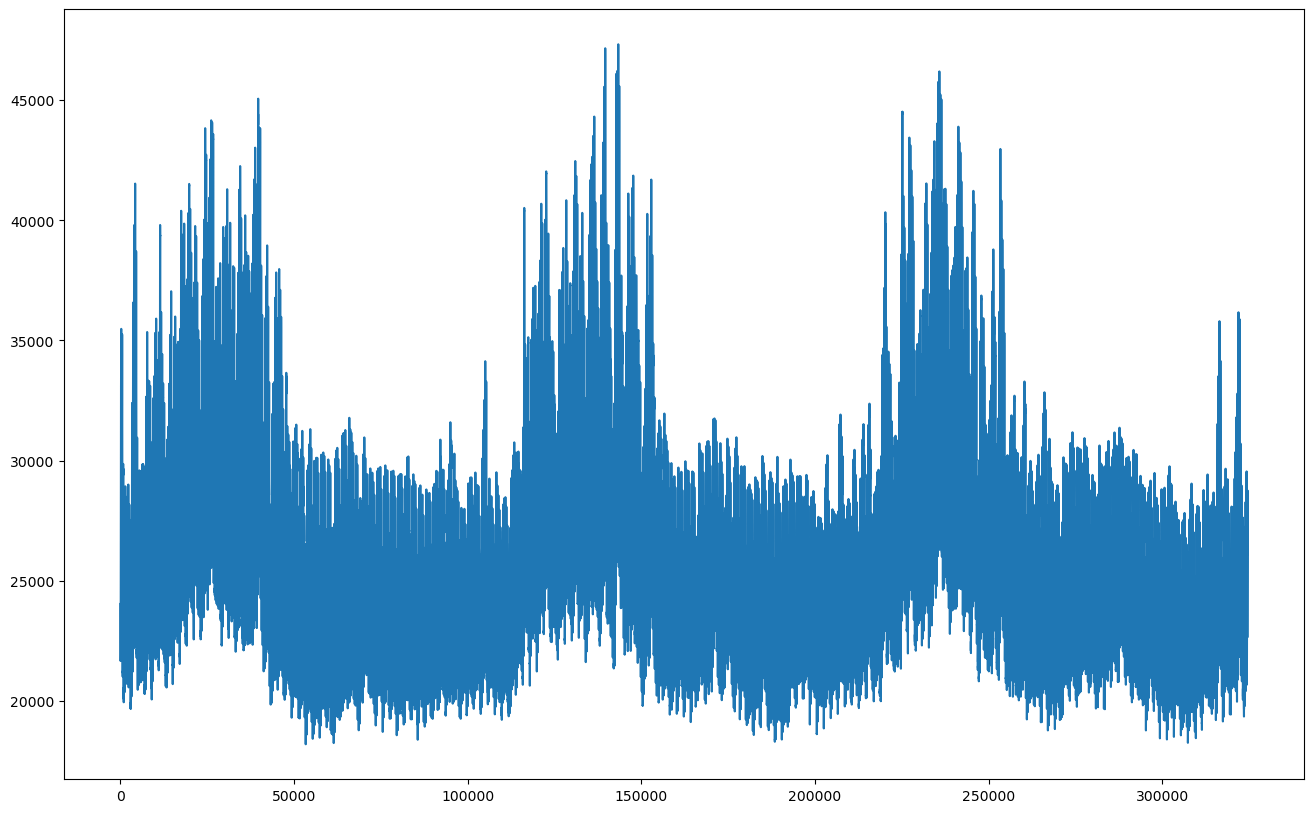

In [6]:
plt.figure(figsize = (16, 10))
plt.plot(df.index, df['Load'])

In [15]:
def calculate_hour_of_year(df, datetime_col_name):
    # Ensure the column is a datetime object
    df[datetime_col_name] = pd.to_datetime(df[datetime_col_name])

    # Extract the date of the beginning of the year for each row
    # astype('M8[Y]') truncates the date to the beginning of the year
    #df['Year_Start'] = df[datetime_col_name].astype('M8[Y]')
    #df['Year_Start'] = df[datetime_col_name].dt.year
    # Create the 'Year_Start' column, making sure it is also a datetime object
    df['Year_Start'] = pd.to_datetime(df[datetime_col_name].dt.year, format='%Y')

    # Calculate the time difference (timedelta) from the start of the year
    time_delta = df[datetime_col_name] - df['Year_Start']

    # Convert the timedelta to total hours and add 1 to get a 1-based index (1 to 8760)
    # The .dt accessor is used to access the time properties of the Timedelta series
    df['hour_index'] = time_delta.dt.total_seconds() // 3600 + 1
    
    # Clean up the temporary column
    df = df.drop(columns=['Year_Start'])
    
    # Convert to integer type
    df['hour_index'] = df['hour_index'].astype(int)

    return df

In [16]:
df = calculate_hour_of_year(df, 'Date')

In [17]:
df

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
0,2014-05-01 00:00:00,1,1,24032.844887,0.0,314.062728,23718.782158,1892.821345,2287.056986,1793.314811,7859.100231,16186.122205,10212.929063,-12.377549,2881
1,2014-05-01 00:05:00,1,2,23924.565362,0.0,295.105121,23629.460241,1872.795630,2287.002839,1638.089648,8017.640777,15901.438945,10103.550828,5.485640,2881
2,2014-05-01 00:10:00,1,3,23825.120831,0.0,286.878657,23538.242173,1860.851580,2286.886355,1595.492447,7697.315440,16117.773338,10374.542956,10.032054,2881
3,2014-05-01 00:15:00,1,4,23703.799221,0.0,281.568693,23422.230528,1856.229999,2287.081875,1441.295192,7447.957304,16249.573119,10664.966053,6.268798,2881
4,2014-05-01 00:20:00,1,5,23553.907284,0.0,275.988442,23277.918842,1846.716080,2287.142445,1396.720704,7316.540233,16236.362088,10705.782859,1.004963,2881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324571,2017-05-31 23:35:00,24,8,23215.061827,0.0,4109.328388,19105.733439,6028.797986,1135.444838,4770.470241,7942.695713,15273.652146,3338.939080,-1.286032,3624
324572,2017-05-31 23:40:00,24,9,23075.372316,0.0,4176.888327,18898.483988,6099.503121,1135.342705,4763.924936,7894.282419,15178.709887,3179.939125,2.380010,3624
324573,2017-05-31 23:45:00,24,10,22945.479640,0.0,4256.351216,18689.128423,6180.097033,1135.226668,4749.677054,7766.123805,15174.292552,3109.291797,5.063283,3624
324574,2017-05-31 23:50:00,24,11,22821.585851,0.0,4329.151903,18492.433948,6254.668771,1135.273875,4679.753365,7622.185412,15196.814030,3127.118020,2.586409,3624


In [18]:
df = df.set_index('Date')

In [19]:
df

,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,,,
2014-05-01 00:00:00,1,1,24032.844887,0.0,314.062728,23718.782158,1892.821345,2287.056986,1793.314811,7859.100231,16186.122205,10212.929063,-12.377549,2881
2014-05-01 00:05:00,1,2,23924.565362,0.0,295.105121,23629.460241,1872.795630,2287.002839,1638.089648,8017.640777,15901.438945,10103.550828,5.485640,2881
2014-05-01 00:10:00,1,3,23825.120831,0.0,286.878657,23538.242173,1860.851580,2286.886355,1595.492447,7697.315440,16117.773338,10374.542956,10.032054,2881
2014-05-01 00:15:00,1,4,23703.799221,0.0,281.568693,23422.230528,1856.229999,2287.081875,1441.295192,7447.957304,16249.573119,10664.966053,6.268798,2881
2014-05-01 00:20:00,1,5,23553.907284,0.0,275.988442,23277.918842,1846.716080,2287.142445,1396.720704,7316.540233,16236.362088,10705.782859,1.004963,2881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-31 23:35:00,24,8,23215.061827,0.0,4109.328388,19105.733439,6028.797986,1135.444838,4770.470241,7942.695713,15273.652146,3338.939080,-1.286032,3624
2017-05-31 23:40:00,24,9,23075.372316,0.0,4176.888327,18898.483988,6099.503121,1135.342705,4763.924936,7894.282419,15178.709887,3179.939125,2.380010,3624
2017-05-31 23:45:00,24,10,22945.479640,0.0,4256.351216,18689.128423,6180.097033,1135.226668,4749.677054,7766.123805,15174.292552,3109.291797,5.063283,3624


In [18]:
df.index = pd.to_datetime(df.index)

In [21]:
df2018 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata_2018.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2018.head())
df2019 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata_2019.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2019.head())
df2020 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata_2020.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2020.head())
df2021 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata_2021.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2021.head())
df2022 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata_2022.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2022.head())
df2023 = pd.read_excel("caiso_raw_data/productionandcurtailmentsdata_2023.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2023.head())
df2024 = pd.read_excel("caiso_raw_data/production-and-curtailments-data-2024.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2024.head())
df2025 = pd.read_excel("caiso_raw_data/production-and-curtailments-data-2025.xlsx", sheet_name=1, parse_dates=["Date"] )
print(df2025.head())

                 Date  Hour  Interval          Load  Solar        Wind  \
0 2018-01-01 00:00:00     1         1  21552.671558    0.0  243.496014   
1 2018-01-01 00:05:00     1         2  21486.779943    0.0  238.499132   
2 2018-01-01 00:10:00     1         3  21391.303108    0.0  227.229805   
3 2018-01-01 00:15:00     1         4  21301.872170    0.0  228.026545   
4 2018-01-01 00:20:00     1         5  21242.270230    0.0  232.213448   

       Net Load   Renewables      Nuclear  Large Hydro      Imports  \
0  21309.175544  2032.994475  2259.991374  2098.405092  7586.553984   
1  21248.280811  2026.481236  2259.952873  2143.557374  7543.249094   
2  21164.073304  2014.528291  2259.809808  2130.224136  7666.711084   
3  21073.845624  2016.257246  2259.802584  2093.382906  7701.705829   
4  21010.056782  2024.277588  2260.008342  2160.635742  7677.751619   

     Generation      Thermal  Load Less (Generation+Imports)  
0  13964.462727  7573.071786                        1.654847  
1 

In [23]:
hourly_avg_df_2014_2017 = df.resample('h').mean()

In [24]:
print(hourly_avg_df_2014_2017)

                     Hour  Interval          Load       Solar         Wind  \
Date                                                                         
2014-05-01 00:00:00   1.0       6.5  23355.659037    0.000000   280.937350   
2014-05-01 01:00:00   2.0       6.5  22257.042087    0.000000   360.136240   
2014-05-01 02:00:00   3.0       6.5  21871.175365    0.000000   480.428007   
2014-05-01 03:00:00   4.0       6.5  21789.769398    0.000000   598.256465   
2014-05-01 04:00:00   5.0       6.5  22113.849124    0.000000   469.549481   
...                   ...       ...           ...         ...          ...   
2017-05-31 19:00:00  20.0       6.5  27783.437679  438.511592  4139.793653   
2017-05-31 20:00:00  21.0       6.5  28617.120411    0.000000  4316.775090   
2017-05-31 21:00:00  22.0       6.5  27831.693189    0.000000  4377.153272   
2017-05-31 22:00:00  23.0       6.5  25666.267054    0.000000  4143.108149   
2017-05-31 23:00:00  24.0       6.5  23489.598051    0.000000  4

In [26]:
df2017 = calculate_hour_of_year(df2017, 'Date')
df2018 = calculate_hour_of_year(df2018, 'Date')
df2019 = calculate_hour_of_year(df2019, 'Date')
df2020 = calculate_hour_of_year(df2020, 'Date')
df2021 = calculate_hour_of_year(df2021, 'Date')
df2022 = calculate_hour_of_year(df2022, 'Date')
df2023 = calculate_hour_of_year(df2023, 'Date')
df2024 = calculate_hour_of_year(df2024, 'Date')
df2025 = calculate_hour_of_year(df2025, 'Date')

In [27]:
df2017 = df2017.set_index('Date')
df2018 = df2018.set_index('Date')
df2019 = df2019.set_index('Date')
df2020 = df2020.set_index('Date')
df2021 = df2021.set_index('Date')
df2022 = df2022.set_index('Date')
df2023 = df2023.set_index('Date')
df2024 = df2024.set_index('Date')
df2025 = df2025.set_index('Date')

In [28]:
hourly_avg_df_2017 = df2017.resample('h').mean()
hourly_avg_df_2018 = df2018.resample('h').mean()
hourly_avg_df_2019 = df2019.resample('h').mean()
hourly_avg_df_2020 = df2020.resample('h').mean()
hourly_avg_df_2021 = df2021.resample('h').mean()
hourly_avg_df_2022 = df2022.resample('h').mean()
hourly_avg_df_2023 = df2023.resample('h').mean()
hourly_avg_df_2024 = df2024.resample('h').mean()
hourly_avg_df_2025 = df2025.resample('h').mean()

In [29]:
print(hourly_avg_df_2018)

                     Hour  Interval          Load  Solar         Wind  \
Date                                                                    
2018-01-01 00:00:00   1.0       6.5  21128.456605    0.0   235.939686   
2018-01-01 01:00:00   2.0       6.5  20529.066806    0.0   277.464527   
2018-01-01 02:00:00   3.0       6.5  19980.803099    0.0   127.765433   
2018-01-01 03:00:00   4.0       6.5  19618.607897    0.0    82.080678   
2018-01-01 04:00:00   5.0       6.5  19638.227117    0.0   126.640384   
...                   ...       ...           ...    ...          ...   
2018-12-31 19:00:00  20.0       6.5  26836.280693    0.0  2321.154856   
2018-12-31 20:00:00  21.0       6.5  25930.227143    0.0  2795.236752   
2018-12-31 21:00:00  22.0       6.5  24964.574765    0.0  3170.911750   
2018-12-31 22:00:00  23.0       6.5  23832.170684    0.0  2795.968222   
2018-12-31 23:00:00  24.0       6.5  22790.548346    0.0  2667.348387   

                         Net Load   Renewables    

In [34]:
hourly_df = pd.concat([hourly_avg_df_2014_2017, hourly_avg_df_2017, hourly_avg_df_2018, hourly_avg_df_2019, hourly_avg_df_2020, hourly_avg_df_2021, hourly_avg_df_2022, hourly_avg_df_2023, hourly_avg_df_2024, hourly_avg_df_2025], ignore_index=False, sort=False)

In [35]:
hourly_df

,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,,,
2014-05-01 00:00:00,1.0,6.5,23355.659037,0.0,280.937350,23074.721687,1848.358307,2287.270174,1399.069807,7413.195548,15940.382392,10405.684104,2.081097,2881.0
2014-05-01 01:00:00,2.0,6.5,22257.042087,0.0,360.136240,21896.905847,1919.628747,2287.412955,1115.117125,7399.596867,14857.989027,9535.830200,-0.543807,2882.0
2014-05-01 02:00:00,3.0,6.5,21871.175365,0.0,480.428007,21390.747358,2010.660248,2286.247517,1269.649728,7468.345271,14402.609811,8836.052318,0.220284,2883.0
2014-05-01 03:00:00,4.0,6.5,21789.769398,0.0,598.256465,21191.512933,2135.100750,2286.510046,1381.971348,7436.297034,14353.189699,8549.607555,0.282665,2884.0
2014-05-01 04:00:00,5.0,6.5,22113.849124,0.0,469.549481,21644.299643,2007.563554,2287.396559,1130.592184,7536.228563,14576.942530,9151.390233,0.678032,2885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,20.0,6.5,25987.116053,0.0,1604.697565,24382.418488,2912.781676,2254.512798,2728.493611,5662.157778,20324.958112,12429.170027,0.000163,8012.0
2025-11-30 20:00:00,21.0,6.5,25348.237849,0.0,1267.357458,24080.880392,2581.541326,2258.581582,2671.890199,5698.750000,19649.440998,12137.427891,0.046851,8013.0
2025-11-30 21:00:00,22.0,6.5,24809.212951,0.0,1418.438338,23390.774613,2725.728898,2260.431598,2529.438827,6024.426667,18784.759948,11269.160625,0.026337,8014.0


In [36]:
hourly_df2 = hourly_df[["Load","Solar","Wind","Net Load","Renewables","Nuclear","Large Hydro","Imports","Generation","Thermal","Load Less (Generation+Imports)","hour_index"]]

In [37]:
hourly_df2

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2014-05-01 00:00:00,23355.659037,0.0,280.937350,23074.721687,1848.358307,2287.270174,1399.069807,7413.195548,15940.382392,10405.684104,2.081097,2881.0
2014-05-01 01:00:00,22257.042087,0.0,360.136240,21896.905847,1919.628747,2287.412955,1115.117125,7399.596867,14857.989027,9535.830200,-0.543807,2882.0
2014-05-01 02:00:00,21871.175365,0.0,480.428007,21390.747358,2010.660248,2286.247517,1269.649728,7468.345271,14402.609811,8836.052318,0.220284,2883.0
2014-05-01 03:00:00,21789.769398,0.0,598.256465,21191.512933,2135.100750,2286.510046,1381.971348,7436.297034,14353.189699,8549.607555,0.282665,2884.0
2014-05-01 04:00:00,22113.849124,0.0,469.549481,21644.299643,2007.563554,2287.396559,1130.592184,7536.228563,14576.942530,9151.390233,0.678032,2885.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,25987.116053,0.0,1604.697565,24382.418488,2912.781676,2254.512798,2728.493611,5662.157778,20324.958112,12429.170027,0.000163,8012.0
2025-11-30 20:00:00,25348.237849,0.0,1267.357458,24080.880392,2581.541326,2258.581582,2671.890199,5698.750000,19649.440998,12137.427891,0.046851,8013.0
2025-11-30 21:00:00,24809.212951,0.0,1418.438338,23390.774613,2725.728898,2260.431598,2529.438827,6024.426667,18784.759948,11269.160625,0.026337,8014.0


In [61]:
hourly_df3 = hourly_df2.round(2)

In [62]:
hourly_df3

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2014-05-01 00:00:00,23355.66,0.0,280.94,23074.72,1848.36,2287.27,1399.07,7413.20,15940.38,10405.68,2.08,2881.0
2014-05-01 01:00:00,22257.04,0.0,360.14,21896.91,1919.63,2287.41,1115.12,7399.60,14857.99,9535.83,-0.54,2882.0
2014-05-01 02:00:00,21871.18,0.0,480.43,21390.75,2010.66,2286.25,1269.65,7468.35,14402.61,8836.05,0.22,2883.0
2014-05-01 03:00:00,21789.77,0.0,598.26,21191.51,2135.10,2286.51,1381.97,7436.30,14353.19,8549.61,0.28,2884.0
2014-05-01 04:00:00,22113.85,0.0,469.55,21644.30,2007.56,2287.40,1130.59,7536.23,14576.94,9151.39,0.68,2885.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,25987.12,0.0,1604.70,24382.42,2912.78,2254.51,2728.49,5662.16,20324.96,12429.17,0.00,8012.0
2025-11-30 20:00:00,25348.24,0.0,1267.36,24080.88,2581.54,2258.58,2671.89,5698.75,19649.44,12137.43,0.05,8013.0
2025-11-30 21:00:00,24809.21,0.0,1418.44,23390.77,2725.73,2260.43,2529.44,6024.43,18784.76,11269.16,0.03,8014.0


In [63]:
rows_with_nans = hourly_df3[hourly_df3["hour_index"].isna()]

In [64]:
rows_with_nans

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2015-03-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-12 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-14 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-13 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-12 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df2017[df2017["hour_index"].isna()]

,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,,,


In [83]:
df2017.index

DatetimeIndex(['2017-06-01 00:00:00', '2017-06-01 00:05:00',
               '2017-06-01 00:10:00', '2017-06-01 00:15:00',
               '2017-06-01 00:20:00', '2017-06-01 00:25:00',
               '2017-06-01 00:30:00', '2017-06-01 00:35:00',
               '2017-06-01 00:40:00', '2017-06-01 00:45:00',
               ...
               '2017-12-31 23:10:00', '2017-12-31 23:15:00',
               '2017-12-31 23:20:00', '2017-12-31 23:25:00',
               '2017-12-31 23:30:00', '2017-12-31 23:35:00',
               '2017-12-31 23:40:00', '2017-12-31 23:45:00',
               '2017-12-31 23:50:00', '2017-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=61644, freq=None)

In [87]:
hourly_df3[hourly_df3.index == '2017-03-12 01:00:00']

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2017-03-12 01:00:00,19084.76,0.0,1354.18,17730.58,3096.71,2282.58,4465.17,6593.61,12491.58,2647.12,-0.44,1682.0


In [95]:
hourly_df3['hour_index'][hourly_df3.index.isin(['2015-03-08 01:00:00', '2016-03-13 01:00:00',
               '2017-03-12 01:00:00', '2018-03-11 01:00:00',
               '2019-03-10 01:00:00', '2020-03-08 01:00:00',
               '2021-03-14 01:00:00', '2022-03-13 01:00:00',
               '2023-03-12 01:00:00', '2024-03-10 01:00:00',
               '2025-03-09 01:00:00'])]

/tmp/ipykernel_350/1058611192.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hourly_df3['hour_index'][hourly_df3.index.isin(['2015-03-08 01:00:00', '2016-03-13 01:00:00',


Date
2015-03-08 01:00:00    1586.0
2016-03-13 01:00:00    1730.0
2017-03-12 01:00:00    1682.0
2018-03-11 01:00:00    1658.0
2019-03-10 01:00:00    1634.0
2020-03-08 01:00:00    1610.0
2021-03-14 01:00:00    1730.0
2022-03-13 01:00:00    1706.0
2023-03-12 01:00:00    1682.0
2024-03-10 01:00:00    1658.0
2025-03-09 01:00:00    1610.0
Name: hour_index, dtype: float64

In [92]:
hourly_df3[hourly_df3.index.isin(['2015-03-08 01:00:00', '2015-03-08 02:00:00', '2015-03-08 03:00:00'])]

/tmp/ipykernel_350/1890828997.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hourly_df3[hourly_df3.index.isin(['2015-03-08 01:00:00', '2015-03-08 02:00:00', '2015-03-08 03:00:00'])]


,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2015-03-08 01:00:00,19805.46,0.0,1002.98,18802.47,2708.20,2279.12,966.71,7457.43,12348.58,6394.56,-0.55,1586.0
2015-03-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-08 03:00:00,19474.98,0.0,1044.92,18430.06,2715.43,2280.19,991.20,7430.89,12044.83,6058.00,-0.74,1588.0


In [88]:
rows_with_nans.index

DatetimeIndex(['2015-03-08 02:00:00', '2016-03-13 02:00:00',
               '2017-03-12 02:00:00', '2018-03-11 02:00:00',
               '2019-03-10 02:00:00', '2020-03-08 02:00:00',
               '2021-03-14 02:00:00', '2022-03-13 02:00:00',
               '2023-03-12 02:00:00', '2024-03-10 02:00:00',
               '2025-03-09 02:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [96]:
hourly_df4 = hourly_df3

In [101]:
hourly_df4['hour_index'][hourly_df4.index.isin(['2015-03-08 02:00:00', '2016-03-13 02:00:00',
               '2017-03-12 02:00:00', '2018-03-11 02:00:00',
               '2019-03-10 02:00:00', '2020-03-08 02:00:00',
               '2021-03-14 02:00:00', '2022-03-13 02:00:00',
               '2023-03-12 02:00:00', '2024-03-10 02:00:00',
               '2025-03-09 02:00:00'])]

/tmp/ipykernel_350/1473763581.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  hourly_df4['hour_index'][hourly_df4.index.isin(['2015-03-08 02:00:00', '2016-03-13 02:00:00',


Date
2015-03-08 02:00:00    1587.0
2016-03-13 02:00:00    1731.0
2017-03-12 02:00:00    1683.0
2018-03-11 02:00:00    1659.0
2019-03-10 02:00:00    1635.0
2020-03-08 02:00:00    1611.0
2021-03-14 02:00:00    1731.0
2022-03-13 02:00:00    1707.0
2023-03-12 02:00:00    1683.0
2024-03-10 02:00:00    1659.0
2025-03-09 02:00:00    1611.0
Name: hour_index, dtype: float64

In [100]:
hourly_df4.loc['2015-03-08 02:00:00', 'hour_index'] = 1587.0
hourly_df4.loc['2016-03-13 02:00:00', 'hour_index'] = 1731.0
hourly_df4.loc['2017-03-12 02:00:00', 'hour_index'] = 1683.0
hourly_df4.loc['2018-03-11 02:00:00', 'hour_index'] = 1659.0
hourly_df4.loc['2019-03-10 02:00:00', 'hour_index'] = 1635.0
hourly_df4.loc['2020-03-08 02:00:00', 'hour_index'] = 1611.0
hourly_df4.loc['2021-03-14 02:00:00', 'hour_index'] = 1731.0
hourly_df4.loc['2022-03-13 02:00:00', 'hour_index'] = 1707.0
hourly_df4.loc['2023-03-12 02:00:00', 'hour_index'] = 1683.0
hourly_df4.loc['2024-03-10 02:00:00', 'hour_index'] = 1659.0
hourly_df4.loc['2025-03-09 02:00:00', 'hour_index'] = 1611.0

In [102]:
rows_with_nans2 = hourly_df4[hourly_df4["hour_index"].isna()]
rows_with_nans2

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,


In [103]:
hourly_df4["hour_index"] = hourly_df4["hour_index"].astype(int)

In [104]:
hourly_df4.dtypes

Load                              float64
Solar                             float64
Wind                              float64
Net Load                          float64
Renewables                        float64
Nuclear                           float64
Large Hydro                       float64
Imports                           float64
Generation                        float64
Thermal                           float64
Load Less (Generation+Imports)    float64
hour_index                          int64
dtype: object

In [105]:
hourly_df4

,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),hour_index
Date,,,,,,,,,,,,
2014-05-01 00:00:00,23355.66,0.0,280.94,23074.72,1848.36,2287.27,1399.07,7413.20,15940.38,10405.68,2.08,2881
2014-05-01 01:00:00,22257.04,0.0,360.14,21896.91,1919.63,2287.41,1115.12,7399.60,14857.99,9535.83,-0.54,2882
2014-05-01 02:00:00,21871.18,0.0,480.43,21390.75,2010.66,2286.25,1269.65,7468.35,14402.61,8836.05,0.22,2883
2014-05-01 03:00:00,21789.77,0.0,598.26,21191.51,2135.10,2286.51,1381.97,7436.30,14353.19,8549.61,0.28,2884
2014-05-01 04:00:00,22113.85,0.0,469.55,21644.30,2007.56,2287.40,1130.59,7536.23,14576.94,9151.39,0.68,2885
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-30 19:00:00,25987.12,0.0,1604.70,24382.42,2912.78,2254.51,2728.49,5662.16,20324.96,12429.17,0.00,8012
2025-11-30 20:00:00,25348.24,0.0,1267.36,24080.88,2581.54,2258.58,2671.89,5698.75,19649.44,12137.43,0.05,8013
2025-11-30 21:00:00,24809.21,0.0,1418.44,23390.77,2725.73,2260.43,2529.44,6024.43,18784.76,11269.16,0.03,8014


In [111]:
summary_df = hourly_df4.groupby(hourly_df4.index.year)['Load'].agg(['sum', 'median', 'max', 'min'])
summary_df

,sum,median,max,min
Date,,,,
2014,1.632132e+08,26902.14,44703.35,18206.72
2015,2.324658e+08,25860.93,47256.71,18477.84
2016,2.310859e+08,25619.80,46007.72,18354.17
2017,2.310922e+08,25530.05,49900.03,18295.90
2018,2.260476e+08,24964.72,46309.76,18066.89
2019,2.194376e+08,24184.93,44148.23,17039.20
2020,2.190993e+08,23797.87,46970.14,15591.38
2021,2.203171e+08,24208.26,43789.44,15865.24
2022,2.247492e+08,24606.90,51472.65,14779.10


In [112]:
summary_df['sum'] = summary_df['sum']/1000000
summary_df

,sum,median,max,min
Date,,,,
2014,163.213159,26902.14,44703.35,18206.72
2015,232.465774,25860.93,47256.71,18477.84
2016,231.085905,25619.80,46007.72,18354.17
2017,231.092164,25530.05,49900.03,18295.90
2018,226.047601,24964.72,46309.76,18066.89
2019,219.437623,24184.93,44148.23,17039.20
2020,219.099328,23797.87,46970.14,15591.38
2021,220.317080,24208.26,43789.44,15865.24
2022,224.749185,24606.90,51472.65,14779.10


In [113]:
hourly_df4.to_parquet('./caiso_oasis_14_25.parquet', compression=None)